# Using use_system_fonts Parameter

This notebook demonstrates the new `use_system_fonts` parameter that allows DataMapPlot to work offline or behind firewalls by skipping Google Fonts downloads.

## Environment Setup

To run this notebook, you need to set up a test environment. Choose one of these methods:

### Option 1: Using the setup script
```bash
cd "/Users/keyu/Library/Mobile Documents/com~apple~CloudDocs/Coding/datamapplot"
./setup_test_env.sh
```

### Option 2: Using conda env create
```bash
cd "/Users/keyu/Library/Mobile Documents/com~apple~CloudDocs/Coding/datamapplot"
conda env create -f environment_test.yml
conda activate datamapplot-test
python -m ipykernel install --user --name datamapplot-test --display-name "DataMapPlot Test (Python 3.9)"
```

### Option 3: Manual setup
```bash
# Create environment
conda create -n datamapplot-test python=3.9 -y
conda activate datamapplot-test

# Install dependencies
pip install numpy pandas matplotlib scikit-learn jupyter ipykernel
pip install -e "/Users/keyu/Library/Mobile Documents/com~apple~CloudDocs/Coding/datamapplot"

# Add to Jupyter
python -m ipykernel install --user --name datamapplot-test --display-name "DataMapPlot Test (Python 3.9)"
```

After setup, restart Jupyter and select the "DataMapPlot Test (Python 3.9)" kernel from the Kernel menu.

In [1]:
import numpy as np
import datamapplot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import warnings

## Generate Sample Data

In [2]:
# Generate synthetic clustered data
np.random.seed(42)
n_samples = 2000
n_clusters = 8

# Create blobs with different densities
X, y = make_blobs(
    n_samples=n_samples,
    n_features=20,
    centers=n_clusters,
    cluster_std=[0.5, 0.8, 1.0, 0.7, 0.9, 0.6, 1.1, 0.75],
    random_state=42,
)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
data_coords = pca.fit_transform(X)

# Create meaningful labels
label_names = [
    "Data Science",
    "Machine Learning",
    "Deep Learning",
    "Computer Vision",
    "Natural Language",
    "Reinforcement Learning",
    "Time Series",
    "Graph Neural Networks",
]

labels = np.array([label_names[i] for i in y])

# Add some noise points
noise_indices = np.random.choice(len(labels), size=100, replace=False)
labels[noise_indices] = "Unlabelled"

print(f"Data shape: {data_coords.shape}")
print(f"Unique labels: {np.unique(labels)}")

Data shape: (2000, 2)
Unique labels: ['Computer Vision' 'Data Science' 'Deep Learning' 'Graph Neural Networks'
 'Machine Learning' 'Natural Language' 'Reinforcement Learning'
 'Time Series' 'Unlabelled']


## Test 1: Default Behavior (Downloads Google Fonts)

Creating plot with default settings (will download Google Fonts if needed)...
Adding glow to scatterplot...


/Users/keyu/Library/Mobile Documents/com~apple~CloudDocs/Coding/datamapplot/datamapplot/plot_rendering.py:469: GoogleAPIUnreachable: Cannot reach out Google APIs to download the font you selected. Will fallback on fonts already installed.
  warn(
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not foun

Placing labels...
Creating initial label placements...
Estimating font size...
Adjusting label placements...
Adding labels to the plot...
Decorating plot...


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

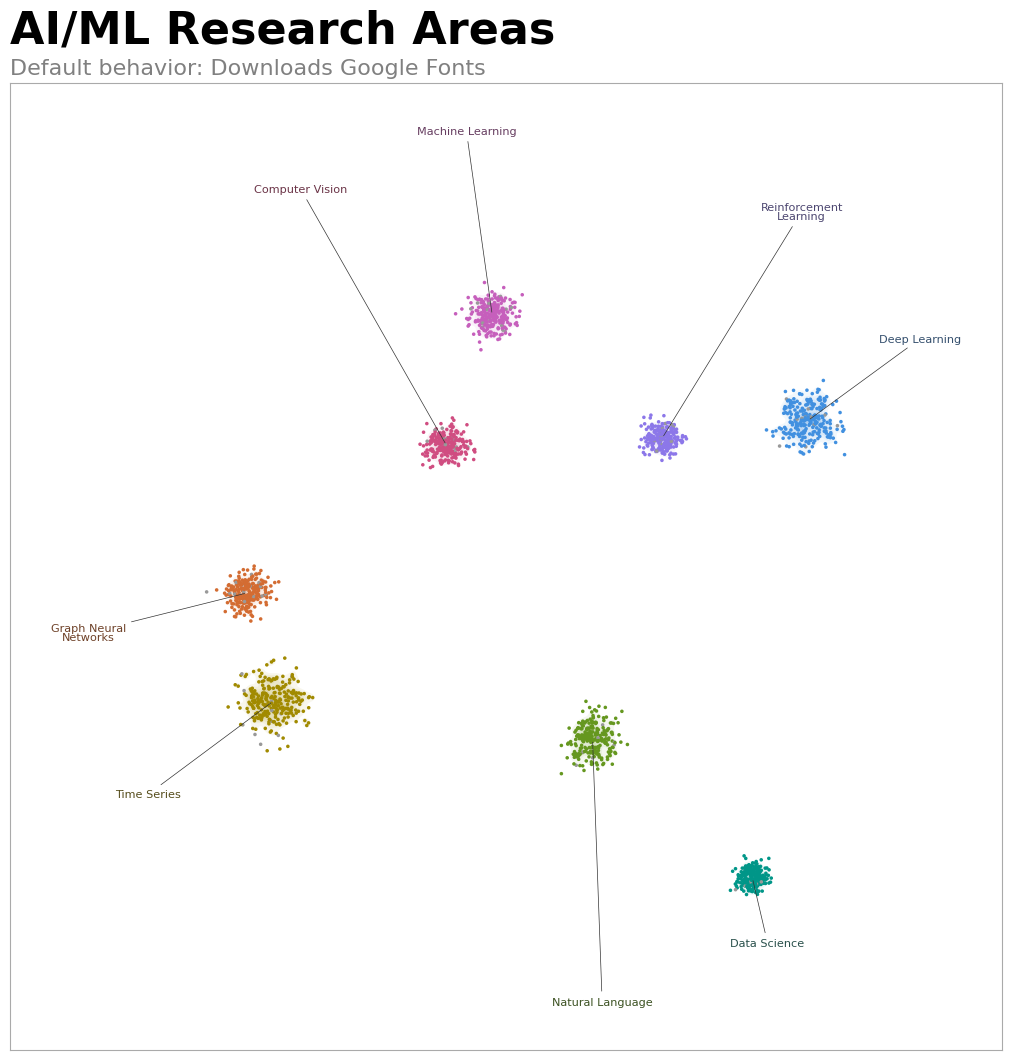

In [3]:
# Default behavior - will attempt to download Google Fonts
print("Creating plot with default settings (will download Google Fonts if needed)...")

fig1, ax1 = datamapplot.create_plot(
    data_coords,
    labels,
    title="AI/ML Research Areas",
    sub_title="Default behavior: Downloads Google Fonts",
    font_family="Roboto",  # Google Font
    use_system_fonts=False,  # This is the default
    verbose=True,
    figsize=(10, 10),
)

plt.show()

## Test 2: Using System Fonts Only (Offline Mode)


Creating plot with system fonts only (offline mode)...
Using system fonts only (use_system_fonts=True)
Adding glow to scatterplot...
Placing labels...
Creating initial label placements...
Estimating font size...
Adjusting label placements...
Adding labels to the plot...
Decorating plot...


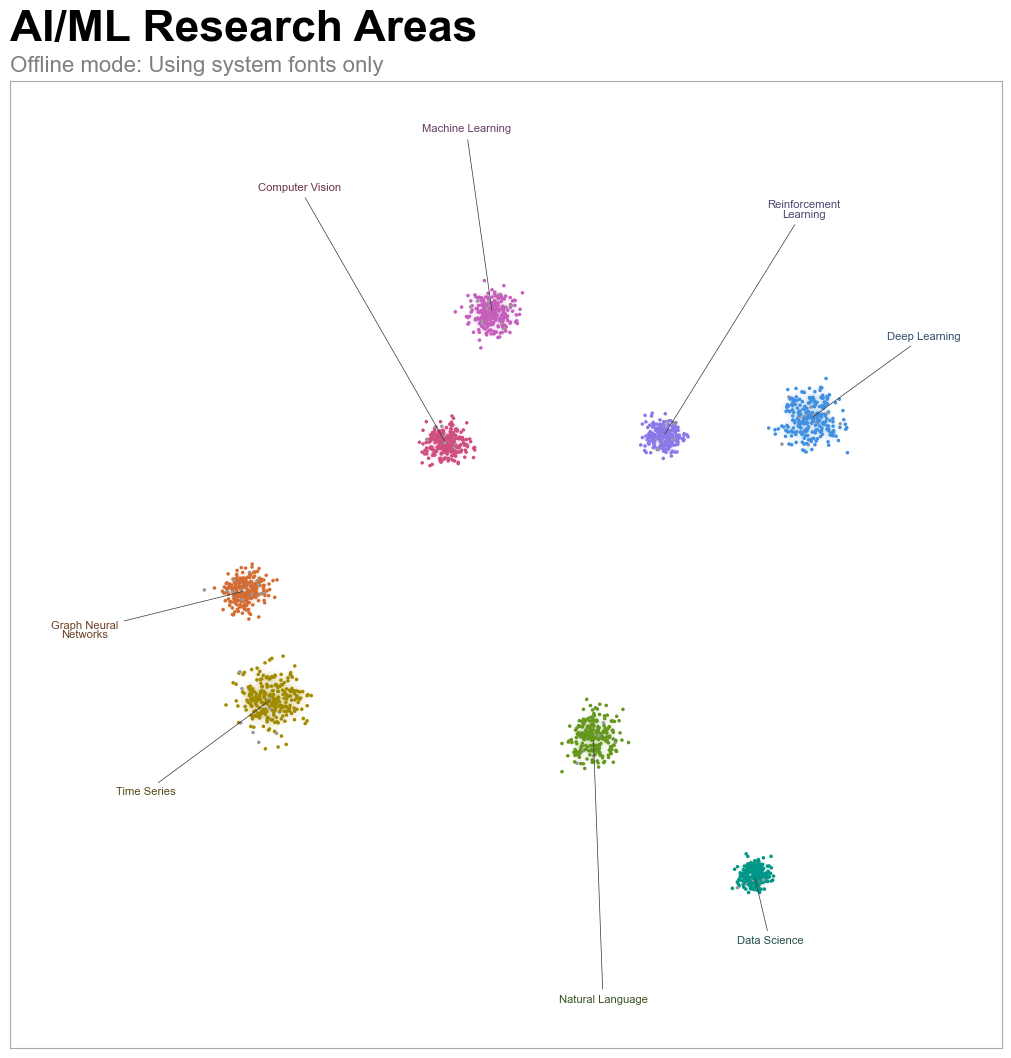

In [4]:
# Using system fonts only - no Google Fonts download
print("\nCreating plot with system fonts only (offline mode)...")

fig2, ax2 = datamapplot.create_plot(
    data_coords,
    labels,
    title="AI/ML Research Areas",
    sub_title="Offline mode: Using system fonts only",
    font_family="Arial",  # Common system font
    use_system_fonts=True,  # Skip Google Fonts
    verbose=True,
    figsize=(10, 10),
)

plt.show()

## Test 3: Different System Fonts

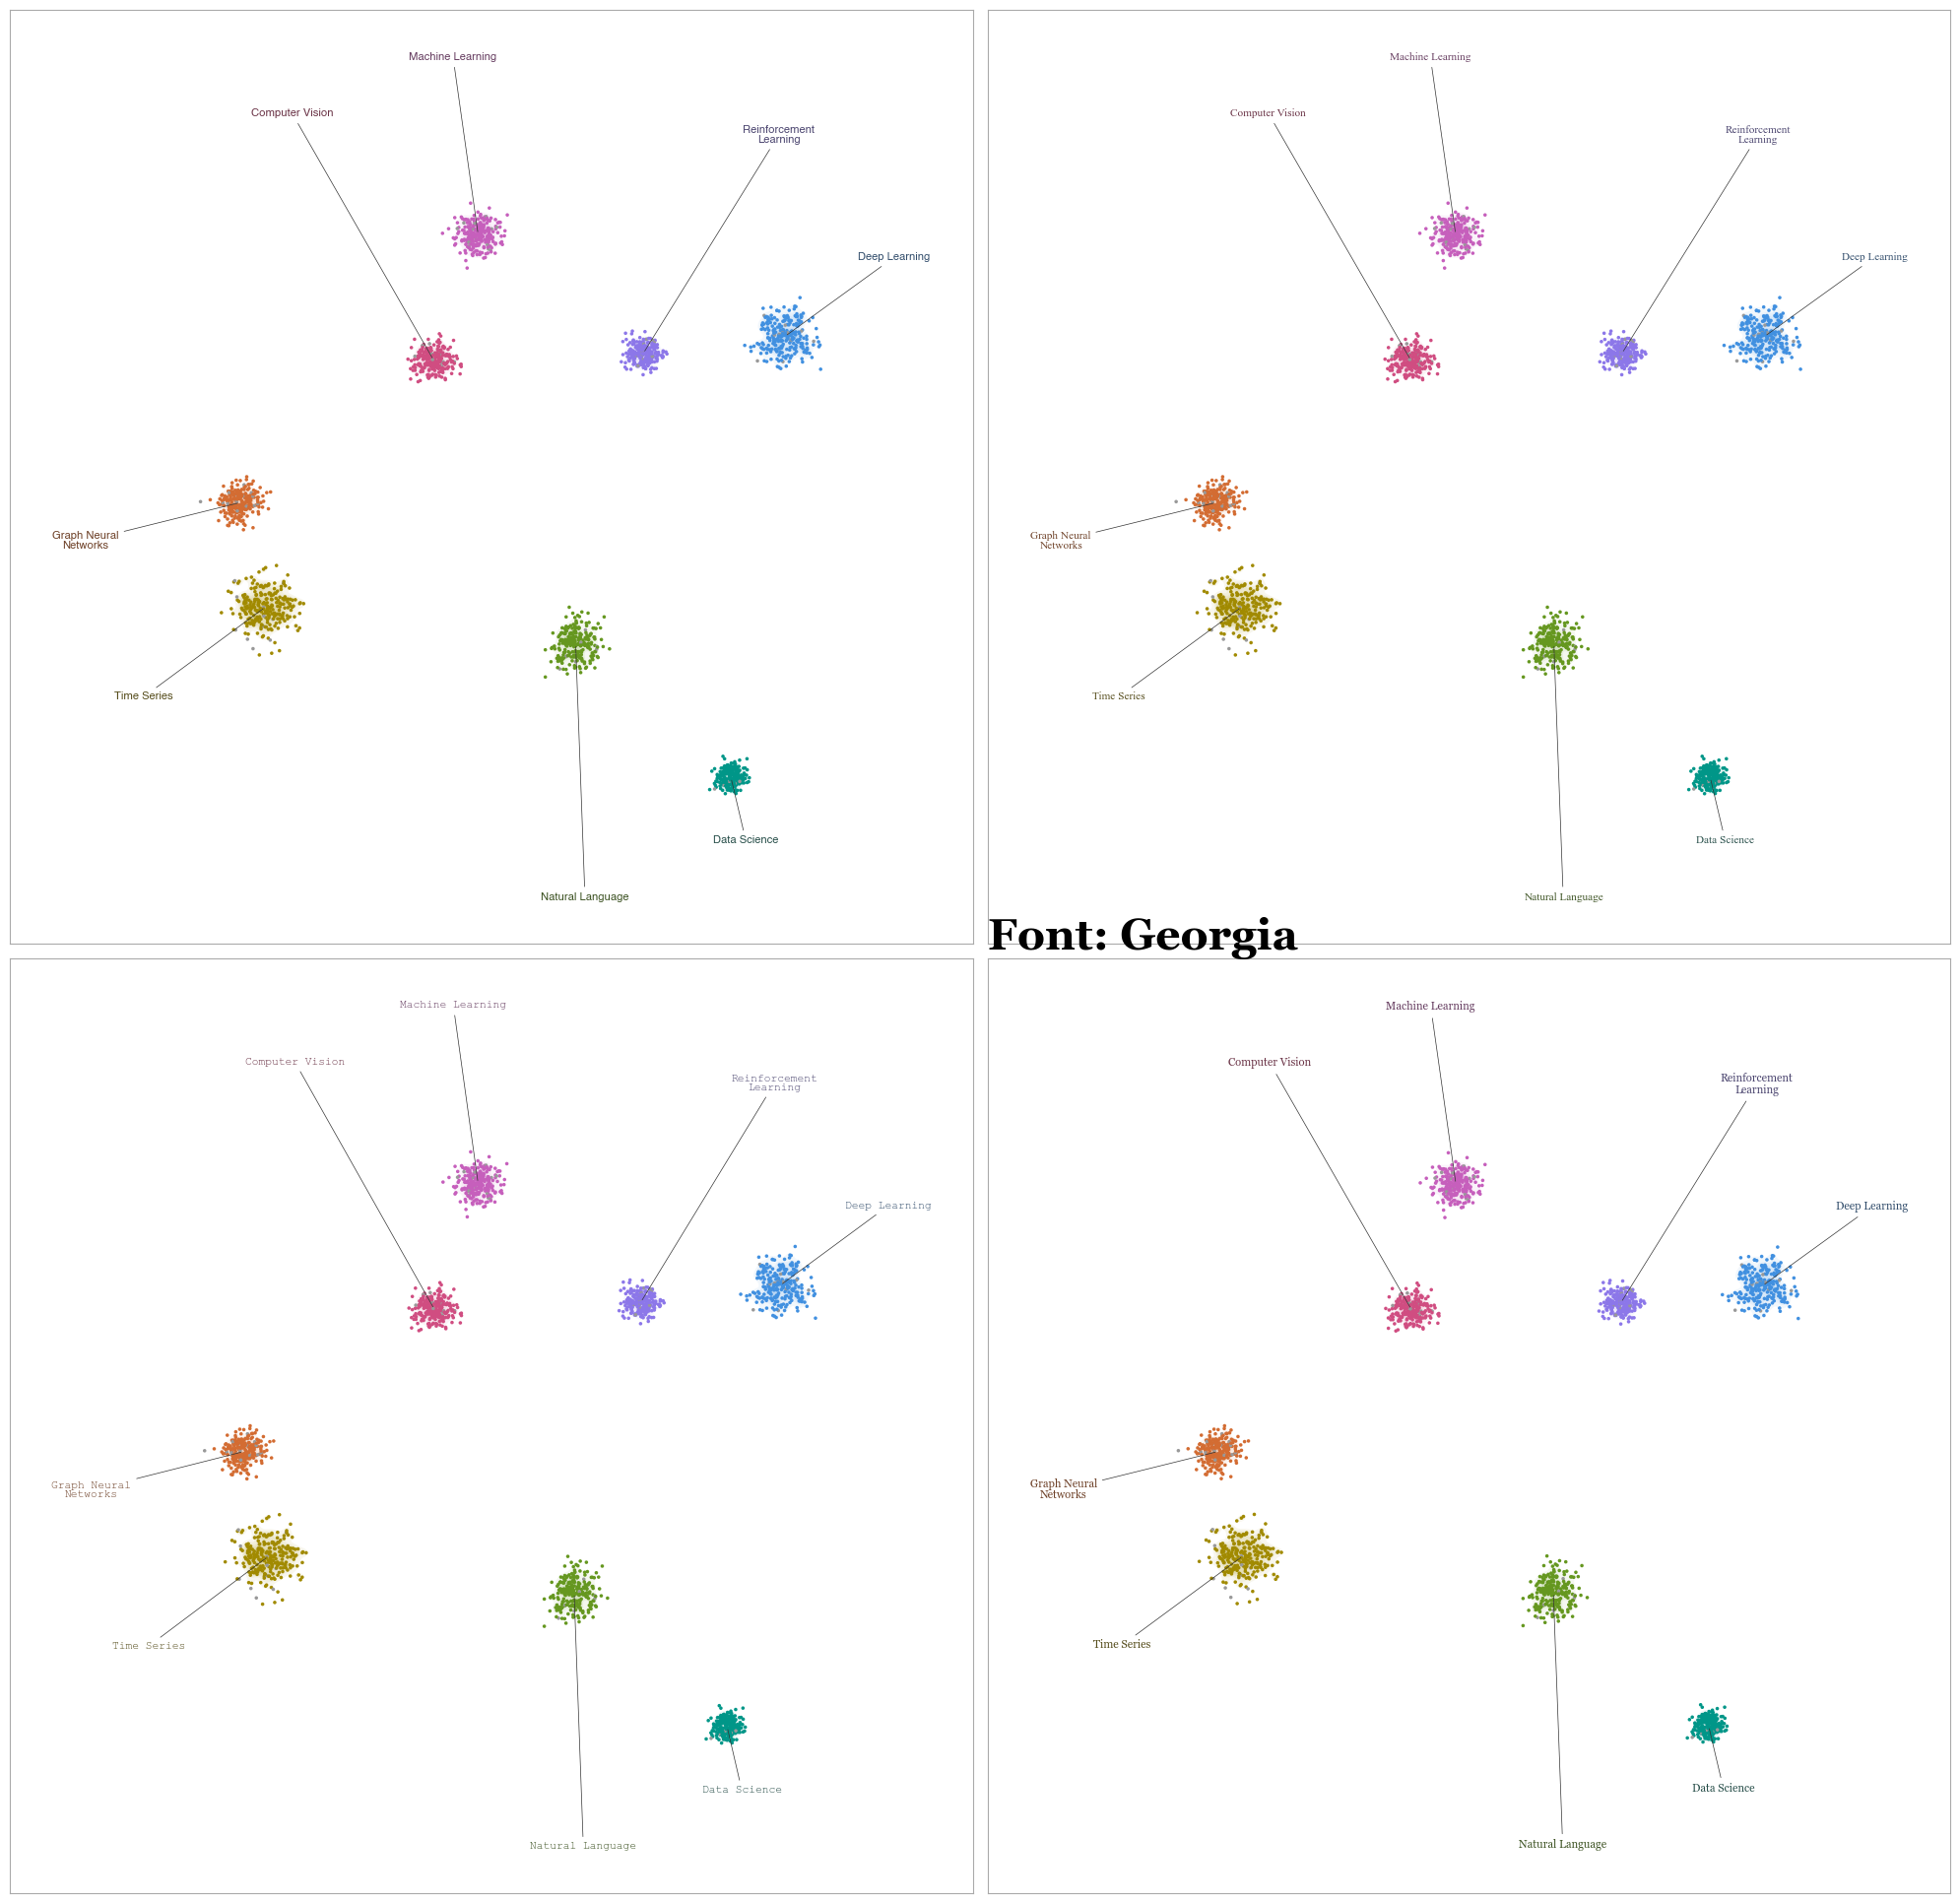

In [5]:
# Test with different system fonts
system_fonts = ["Helvetica", "Times New Roman", "Courier New", "Georgia"]

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()

for i, font in enumerate(system_fonts):
    try:
        fig_temp, ax = datamapplot.create_plot(
            data_coords,
            labels,
            title=f"Font: {font}",
            font_family=font,
            use_system_fonts=True,
            ax=axes[i],
            verbose=False,
        )
    except Exception as e:
        axes[i].text(
            0.5,
            0.5,
            f"Font '{font}' not available\n{str(e)}",
            transform=axes[i].transAxes,
            ha="center",
            va="center",
        )
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Test 4: Custom Title and Subtitle Fonts

Using system fonts only (use_system_fonts=True)
Adding glow to scatterplot...
Placing labels...
Creating initial label placements...
Estimating font size...
Adjusting label placements...
Adding labels to the plot...
Decorating plot...


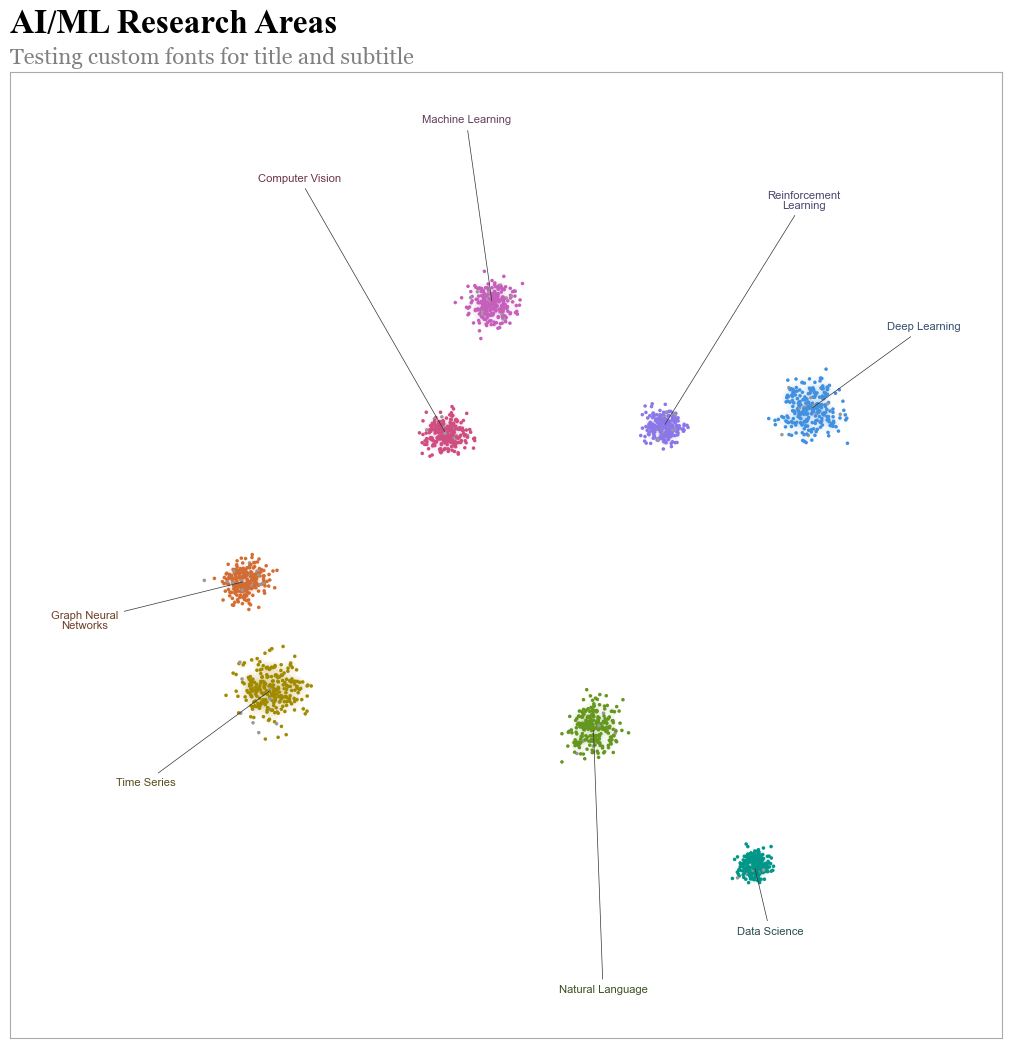

In [6]:
# Test with custom title and subtitle fonts
fig3, ax3 = datamapplot.create_plot(
    data_coords,
    labels,
    title="AI/ML Research Areas",
    sub_title="Testing custom fonts for title and subtitle",
    font_family="Arial",
    title_keywords={"fontfamily": "Times New Roman", "fontsize": 24},
    sub_title_keywords={"fontfamily": "Georgia", "fontsize": 16},
    use_system_fonts=True,
    verbose=True,
    figsize=(10, 10),
)

plt.show()

## Test 5: Simulating Offline Environment

Simulating offline environment (Google Fonts unreachable)...
Adding glow to scatterplot...


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

Placing labels...
Creating initial label placements...
Estimating font size...
Adjusting label placements...
Adding labels to the plot...
Decorating plot...

Warnings issued: 1
- Cannot reach out Google APIs to download the font you selected. Will fallback on fonts already installed.


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

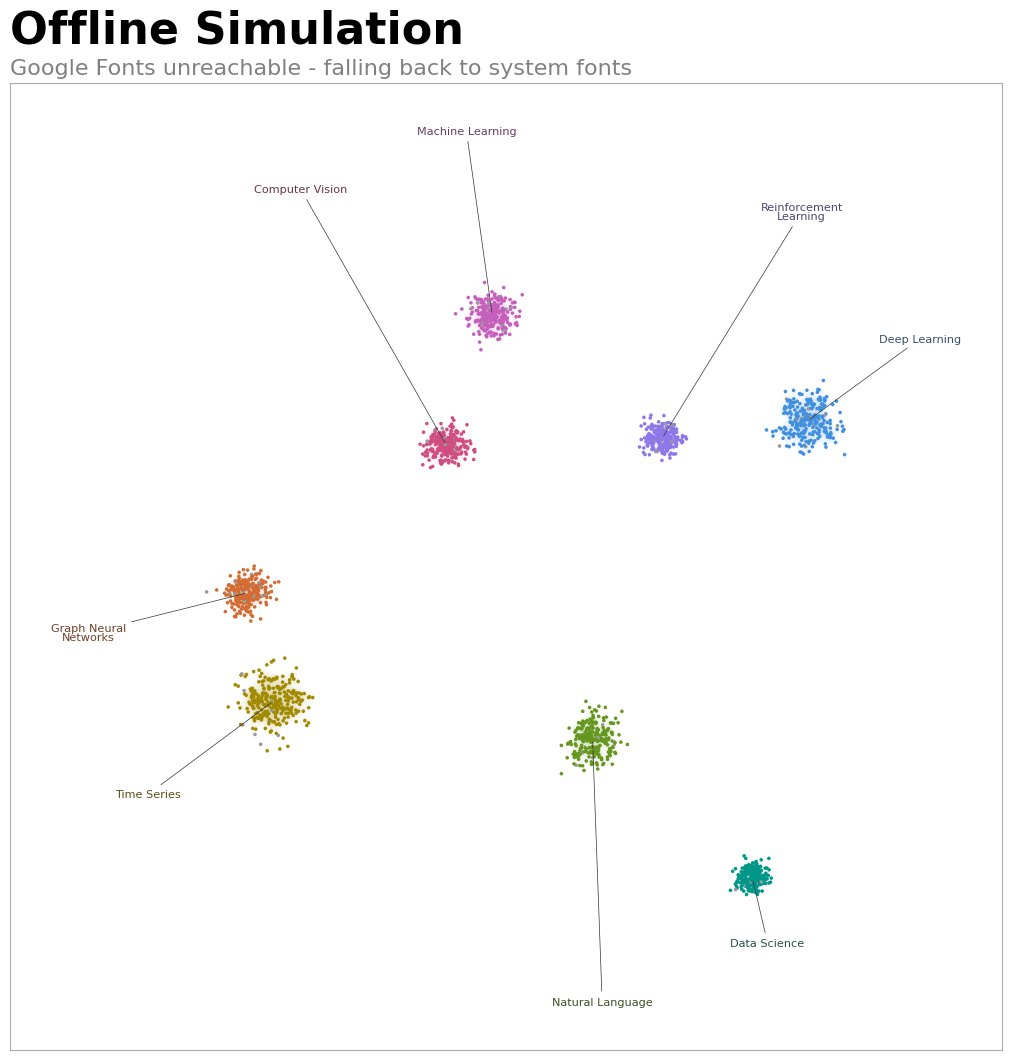

In [7]:
# Simulate what happens when Google Fonts is unreachable
from unittest.mock import patch

# Mock the can_reach_google_fonts function to simulate no internet
with patch("datamapplot.plot_rendering.can_reach_google_fonts", return_value=False):
    print("Simulating offline environment (Google Fonts unreachable)...")

    # This should show a warning but still work
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")

        fig4, ax4 = datamapplot.create_plot(
            data_coords,
            labels,
            title="Offline Simulation",
            sub_title="Google Fonts unreachable - falling back to system fonts",
            font_family="Roboto",  # Will fall back since can't download
            use_system_fonts=False,  # Still trying to use Google Fonts
            verbose=True,
            figsize=(10, 10),
        )

        # Print any warnings
        if w:
            print(f"\nWarnings issued: {len(w)}")
            for warning in w:
                print(f"- {warning.message}")

plt.show()

## Test 6: Performance Comparison

In [8]:
import time

# Time the plot creation with and without font downloads
print("Performance comparison...\n")

# With Google Fonts (first time might download)
start_time = time.time()
fig, ax = datamapplot.create_plot(
    data_coords[:500],  # Smaller dataset for quicker test
    labels[:500],
    title="Performance Test",
    font_family="Roboto",
    use_system_fonts=False,
    verbose=False,
)
plt.close(fig)
time_with_google = time.time() - start_time

# With system fonts only
start_time = time.time()
fig, ax = datamapplot.create_plot(
    data_coords[:500],
    labels[:500],
    title="Performance Test",
    font_family="Arial",
    use_system_fonts=True,
    verbose=False,
)
plt.close(fig)
time_system_only = time.time() - start_time

print(f"Time with Google Fonts check: {time_with_google:.2f} seconds")
print(f"Time with system fonts only: {time_system_only:.2f} seconds")
print(f"Difference: {time_with_google - time_system_only:.2f} seconds")

/Users/keyu/Library/Mobile Documents/com~apple~CloudDocs/Coding/datamapplot/datamapplot/plot_rendering.py:469: GoogleAPIUnreachable: Cannot reach out Google APIs to download the font you selected. Will fallback on fonts already installed.
  warn(


Performance comparison...



findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


Time with Google Fonts check: 1.10 seconds
Time with system fonts only: 1.08 seconds
Difference: 0.02 seconds


## Test 7: Available System Fonts

In [9]:
# List available system fonts
from matplotlib import font_manager

# Get all available font families
available_fonts = sorted(set([f.name for f in font_manager.fontManager.ttflist]))

print(f"Total available system fonts: {len(available_fonts)}\n")
print("Common fonts that should work with use_system_fonts=True:")

common_fonts = [
    "Arial",
    "Helvetica",
    "Times New Roman",
    "Georgia",
    "Verdana",
    "Courier New",
    "Comic Sans MS",
    "Impact",
    "Trebuchet MS",
    "Palatino",
]

for font in common_fonts:
    if font in available_fonts:
        print(f"✓ {font}")
    else:
        print(f"✗ {font} (not available)")

print("\nFirst 20 available fonts:")
for font in available_fonts[:20]:
    print(f"  - {font}")

Total available system fonts: 443

Common fonts that should work with use_system_fonts=True:
✓ Arial
✓ Helvetica
✓ Times New Roman
✓ Georgia
✓ Verdana
✓ Courier New
✓ Comic Sans MS
✓ Impact
✓ Trebuchet MS
✓ Palatino

First 20 available fonts:
  - .Aqua Kana
  - .CJK Symbols Fallback HK
  - .Keyboard
  - .New York
  - .SF Arabic
  - .SF Arabic Rounded
  - .SF Armenian
  - .SF Armenian Rounded
  - .SF Camera
  - .SF Compact
  - .SF Compact Rounded
  - .SF Georgian
  - .SF Georgian Rounded
  - .SF Hebrew
  - .SF Hebrew Rounded
  - .SF NS Mono
  - .SF NS Rounded
  - .SF Soft Numeric
  - .ThonburiUI
  - Academy Engraved LET


## Summary

The `use_system_fonts` parameter allows you to:

1. **Work offline**: No internet connection required
2. **Work behind firewalls**: No need to access Google Fonts servers
3. **Improve performance**: Skip the font download check
4. **Ensure consistency**: Use fonts that are guaranteed to be on your system

### Usage Guidelines:

- Set `use_system_fonts=True` when working offline or behind restrictive firewalls
- Use common system fonts like Arial, Helvetica, or Times New Roman
- Check available fonts on your system using matplotlib's font manager
- The parameter affects all font downloads including title and subtitle fonts